In [45]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import warnings
import os
import sys

In [61]:
# Load the data
rolls = np.load('rolls.npy')
# Split data into train and validation sets
# print(rolls)
split_point = len(rolls) // 2
train_data = rolls[:split_point].reshape(-1, 1)
valid_data = rolls[split_point:].reshape(-1, 1)
# print(train_data)
# Set constant probabilities for the fair die
fair_die_probs = np.array([1/6,1/6,1/6,1/6,1/6,1/6])

# Number of iterations to search for the best emission probabilities
num_iterations = 100

best_model = None
best_score = float('-inf')

In [62]:
np.random.seed(13)
mat = np.random.rand(num_iterations,6)
for iteration in range(num_iterations):
    unfair_die_probs = mat[iteration].copy()
    unfair_die_probs /= unfair_die_probs.sum()
    startprob_init = np.array([1.0,0.0])
    transmat_init = np.array([[0.95,0.05], [0.05, 0.95]])
    emissionprob_init = np.array([fair_die_probs, unfair_die_probs])
    model = hmm.CategoricalHMM(n_components=2,init_params="")
    model.startprob_ = startprob_init
    model.transmat_ = transmat_init
    model.emissionprob_ = emissionprob_init
    model.fit(train_data)
    score = model.score(valid_data)
    
    if score > best_score:
        best_score = score
        best_model = model

print(f"Best Fair Die Probabilities: {fair_die_probs}")
print(f"Best Random Unfair Die Probabilities: {best_model.emissionprob_[1]}")
print(f"Best Model Score on Validation Set: {best_score}")

Best Fair Die Probabilities: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Best Random Unfair Die Probabilities: [0.10057299 0.12112547 0.10642414 0.1048476  0.10759229 0.45943751]
Best Model Score on Validation Set: -43090.35099539459


In [59]:
predicted_states = best_model.predict(rolls.reshape(-1, 1))
switch_sequence = np.diff(predicted_states) != 0
switch_indices = np.where(switch_sequence)[0] + 1

print("Most Likely Sequence of Switching:")
print(switch_indices)

Most Likely Sequence of Switching:
[   18    39   145   152   237   262   337   431   459   505   610   624
   733   768   970  1064  1232  1271  1664  1677  1695  1705  1750  1780
  2062  2102  2272  2287  2304  2324  2374  2398  2467  2481  2514  2530
  2800  2829  3003  3035  3069  3092  3132  3143  3182  3216  3236  3253
  3494  3524  3907  3929  3973  4002  4050  4063  4254  4275  4314  4351
  4468  4487  4546  4599  4867  4896  4910  4935  5065  5117  5281  5294
  5603  5687  5756  5771  5820  5848  5935  5955  6112  6120  6250  6269
  6484  6565  6602  6633  6666  6693  6714  6739  6763  6851  6965  6981
  7011  7030  7173  7197  7223  7241  7343  7378  7477  7491  7579  7659
  7722  7745  7825  7841  7901  7926  8165  8183  8234  8255  8503  8514
  8528  8558  8661  8683  8715  8730  9013  9034  9145  9172  9208  9238
  9392  9418  9530  9554  9632  9654  9805  9841  9928  9967 10109 10131
 10614 10625 10654 10674 10734 10742 10828 10858 10915 10928 10983 11002
 11029 11043 110

(709,)


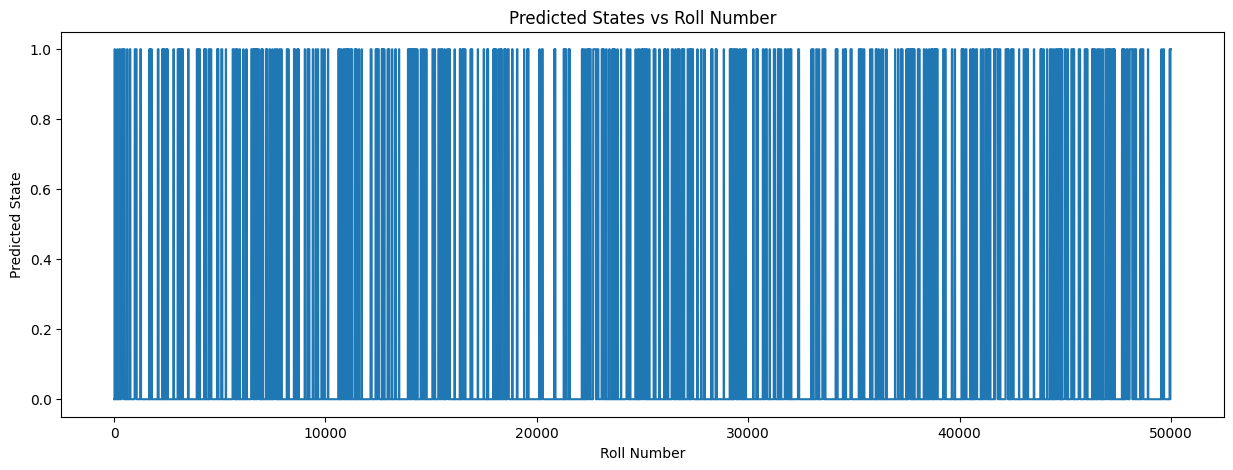

In [60]:
# Predicted states is a binary array where 0 is fair die and 1 is loaded die. Plot predicted states vs the index of the roll using a line graph.
plt.figure(figsize=(15, 5))
print(switch_indices.shape)
plt.plot(predicted_states)
plt.title("Predicted States vs Roll Number")
plt.xlabel("Roll Number")
plt.ylabel("Predicted State")
plt.show()



This task corresponds to the decoding problem in Hidden Markov Models. The decoding problem involves finding the most likely sequence of hidden states given the observed data, which is precisely what we did in Task 2.